<a href="https://colab.research.google.com/github/Renggobawaniw/sms-spam-collection.csv/blob/main/SI611014_Renggo_Bawani_Wijayaningrum_Hactivate_Teknologi_Indonesia_Assigment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama dan Background**

# INTRODUCTION
 Nama : Renggo Bawani Wijayaningrum


 Instansi : Universitas Islam Sultan Agung

 DATA SET : https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download

 Background : Koleksi SMS Spam adalah sekumpulan pesan yang diberi tag SMS yang telah dikumpulkan untuk penelitian SMS Spam. Ini berisi satu set pesan SMS dalam bahasa Inggris dari 5.574 pesan, diberi tag menurut kategori ham (sah) atau spam.
 File-file tersebut berisi satu pesan per baris. Setiap baris terdiri dari dua kolom: v1 berisi label (ham atau spam) dan v2 berisi teks mentah.

Korpus ini dikumpulkan dari sumber-sumber penelitian gratis atau gratis di Internet:

-> Kumpulan 425 pesan spam SMS diekstraksi secara manual dari situs Web Grumbletext. Ini adalah forum Inggris di mana pengguna ponsel membuat klaim publik tentang pesan spam SMS, kebanyakan dari mereka tanpa melaporkan pesan spam yang diterima. Identifikasi teks pesan spam dalam klaim merupakan tugas yang sangat sulit dan memakan waktu, dan memerlukan pemindaian ratusan halaman web secara cermat. Situs Web Grumbletext adalah: [Tautan Web].
-> Subset dari 3.375 SMS pesan ham yang dipilih secara acak dari NUS SMS Corpus (NSC), yang merupakan kumpulan data dari sekitar 10.000 pesan sah yang dikumpulkan untuk penelitian di Departemen Ilmu Komputer di National University of Singapore. Pesan-pesan tersebut sebagian besar berasal dari warga Singapura dan sebagian besar dari mahasiswa yang kuliah di Universitas. Pesan-pesan ini dikumpulkan dari para relawan yang diberi tahu bahwa kontribusi mereka akan dipublikasikan. NUS SMS Corpus tersedia di: [Web Link].
-> Daftar 450 pesan SMS ham yang dikumpulkan dari Tesis PhD Caroline Tag tersedia di [Web Link].
-> Terakhir, kami telah memasukkan SMS Spam Corpus v.0.1 Besar. Ini memiliki 1.002 pesan SMS ham dan 322 pesan spam dan tersedia untuk umum di: [Web Link].

# PROBLEM
masalah dalam SMS COLLECTION DATA SET ini adalah memprdediksi model sms menggunakan berbagai metode yang sesuai dan menemukan kriteria teks unik dalam program sms collection ini


# STEP PENGERJAANYA SEPERTI APA
pertamanya kita akan mengimpor datanya dulu menggunakan pandas lalu jika sudah selesai kita impor kita melihat data yang akan kita analisis. kemudian kita akan memproses data tersebut menggunakan beberapa metode yang akan kita eksplor yaitu mengonversi ke huruf kecil,kontraksi,menghapus atau mengubah angka menjadi teks,hapus tanda baca,hilangkan spasi putih,hapus stops word dengan kriteria tertentu. setelah semua itu sudah kita selesaikan kita akan lanjut dengan teks prepocessing yang kedua yaitu mengilangkan pemborosan kata menjadi sebuhu 1 kata saja atau kata dasar misal pergi pergi menjadi pergi atau kepedulian menjadi peduli tanpa adanya kata awalan dan akhiran. lalu kita lanjut ke bagian data eksplorations teks dan teks clasifications

# DATA

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_sms = pd.read_csv('/content/sms_spam_collection.csv')

In [ ]:
df_sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Pada hasil analisis ini ham lebih banyak jumlanya dibanding yang spam

In [ ]:
df_sms['message'].loc[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

pada teks pertama keluar kata go until jurong....

In [ ]:
df_sms['message'].loc[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

pada teks kedua keluar kata kata free entry in 2 wkly compy to win FA..

# TEXT PREPOCESSING 1

teks prepocessing menggunakan beberapa metode mengkonversi ke huruf kecil,kontraksi,menghapus atau mengubah angka menjadi teks,hapus tanda baca,hilangkan spasi putih,menghapus stops word atau kata kata tertentu yang tidak digunakan.

## CONVERTING TO LOWER CASE

In [ ]:
def to_lower(text):
    return text.lower()

Fungsi to_lower(text) ini digunakan untuk mengonversi semua huruf dalam teks menjadi huruf kecil (lowercase). Ini berguna dalam pemrosesan teks, terutama dalam analisis teks atau NLP, karena dapat membantu dalam konsistensi dan keseragaman dalam pemrosesan teks.

Contohnya, ketika Anda ingin membandingkan kata-kata atau mencari kata-kata dalam teks, Anda mungkin ingin memperlakukan huruf besar dan huruf kecil sebagai sama. Dengan mengonversi semua huruf menjadi huruf kecil, Anda dapat memastikan konsistensi ini.

Misalnya, jika Anda memiliki teks "Hello, World!" dan Anda ingin mencari kata "hello", jika Anda tidak menggunakan konversi huruf kecil, pencarian tersebut mungkin tidak akan berhasil karena "hello" dan "Hello" dianggap berbeda. Namun, dengan menggunakan konversi huruf kecil, Anda dapat memastikan bahwa pencarian tersebut berhasil.








In [ ]:
text_string = "Summer November 10th 2021"
text_string = to_lower(text_string)
print(text_string)

summer november 10th 2021


mengubah huruf yang sebelumnya besar atau kapital menjadi huruf kecil yaitu dari Summer Novembebr  10th 2021 menjadi summer december 10th 2019, huruf S dan D menjadi kecil itu yang dinamakan Converting to lower case

## CONTRACTION

dalam metode kontraksi ini kita akan mengidentifikasi teks maana saja yang membutuhkan kata atau huruf yang jelas atau kebutuhan spesifik atas sebuah kata yang terdapat dalam kasus tersebut.
misal :
I've done it menjadi I have doe it

In [ ]:
import re

In [ ]:
contractions_dict = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [ ]:
text_string = "If I ain't got you"
text_string = main_contraction(text_string)
print(text_string)

If I am not got you


dalam codingan yang dimaksud dengan main_contraction dalam sebuah frasa kata I ain't adalah I am not

## REMOVE OR CONVERT NUMBER INTO TEXT
Dalam pembahasan ini kita akan menghapus angka menjadi teks atau angka nya menjadi tidak ada atau hilang

In [ ]:
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

Fungsi remove_numbers(text) digunakan untuk menghapus semua angka dari teks yang diberikan. Ini berguna dalam pemrosesan teks jika Anda ingin fokus pada kata-kata atau tanda baca dan ingin mengabaikan angka.

In [ ]:
text_string = "I was born in 2002"
text_string = remove_numbers(text_string)
print(text_string)

I was born in 


dalam teks tersebut kita tahu bahwa angka yang terdapat teks tersebut hilang karena kitaa kita remove atau menghapus angka dari I was born in 2002 menjadi I was born in

## REMOVE PUNCTUATION
.Fungsi REMOVE PUNCTUATION (jika itu nama yang sebenarnya) dalam kodingan biasanya digunakan untuk menghapus tanda baca dari teks. Tanda baca seperti titik, koma, tanda tanya, dll. seringkali tidak diperlukan dalam analisis teks tertentu, terutama ketika fokusnya adalah pada kata-kata atau fitur teks lainnya.

Dengan menghapus tanda baca, kita dapat membersihkan teks dan membuatnya lebih sederhana untuk diproses atau dianalisis. Ini dapat membantu dalam tahap pra-pemrosesan dalam pemrosesan bahasa alami (NLP) atau analisis teks.dalam pembahasan ini artinya kita akan menghilangkan tanda baca yang terdapat didalam sebuah teks atau kalimat

In [ ]:
from string import punctuation

punctuation ini untuk memfilter atau menghapus tanda baca dari teks dengan lebih mudah dan lebih efisien.







In [ ]:
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

Fungsi remove_punct(text) digunakan untuk menghapus semua tanda baca dari teks yang diberikan. Ini berguna dalam banyak aplikasi pemrosesan teks di mana tanda baca tidak relevan atau mengganggu, seperti tokenisasi, analisis sentimen, atau pemodelan bahasa.

In [ ]:
text_string = "There was rama, panji, fanya and I"
text_string = remove_punct(text_string)
print(text_string)

There was rama panji fanya and I


Teks atau kalimat "There was rama,panji,fanya and I" menjadi tidak terdapat tanda baca menjadi There was bobby alex fergie and I

## REMOVE WITH SPACES
Dalam pembahasan ini kita akan mengilangkan spasi yang panjang atau spasi putih dalam sebuah kalimat atau teks

In [ ]:
def to_strip(text):
    return " ".join(text.split())

In [ ]:
text_string = "There   was      rama, panji, fanya and I"
text_string = to_strip(text_string)
print(text_string)

There was rama, panji, fanya and I


di dalam teks tersebut atau kalimat tersebut terdapat spasi yang berlebihan jaraknya atau spasi putih "There was        rama,panji,fanya and I menjadi there was rama,panji,fanya and I jadinya tidak ada jarak antara kata yang satu dengan yang lain

## REMOVE STOP WORD AND PARTICULAR WORD
Dalam pembahasan ini kita akan menghapus kata kata yang tidak diperlukan dalam sebuah kalimat dalam kasus tersebut. Stopwords adalah kata-kata yang terlalu sering muncul dan tidak memberikan wawasan tambahan
<br>
Contoh kata henti:
Aku, aku, diriku sendiri, kita, milik kita, diri kita sendiri, kamu, dirimu sendiri,…..

In [ ]:
!pip install nltk

Perintah !pip install nltk digunakan untuk menginstal pustaka Natural Language Toolkit (NLTK) di lingkungan Python Anda menggunakan pip, manajer paket Python. NLTK adalah pustaka populer yang digunakan untuk membangun program Python untuk bekerja dengan data teks dalam pemrosesan bahasa alami (NLP).

In [ ]:
import nltk
from nltk.corpus import stopwords

from nltk.corpus import stopwords mengimport modul stopwords dari pustaka NLTK (Natural Language Toolkit). Modul ini berisi daftar kata-kata yang umumnya dianggap tidak informatif atau tidak relevan dalam konteks analisis teks. Kata-kata tersebut dikenal sebagai "stopwords".

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

nltk.download('stopwords'): Perintah ini digunakan untuk mengunduh dataset yang berisi daftar stopwords dari NLTK corpus. Stopwords adalah kata-kata yang umumnya dianggap tidak informatif atau tidak relevan dalam analisis teks, seperti "the," "is," "at,some,and" dan sebagainya.

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

In [ ]:
text_string = "There was rama, panji, Fredo and I"
text_string = remove_stopwords(text_string)
print(text_string)

There rama , panji , Fredo I


Dalam pembahasan ini kita akan menghilangkan kata yang terdapat di dalam teks atau kalimat yang ada di list stopwords atau yang ada kata gabungan atau sambung kata and atau dan menjadi tidak ada

## COMBINE PREPOCESSING METHOD
Dalam pembahasan ini membahas gabungan semua metode yang sebelumnya dipakai untuk kasus ini dari converting to lower sampai Remove stop word and particular word

In [ ]:
pd.options.display.max_colwidth = None

In [ ]:
df_sms['message_prep1'] = df_sms['message'].apply(to_lower)
df_sms['message_prep2'] = df_sms['message_prep1'].apply(main_contraction)
df_sms['message_prep3'] = df_sms['message_prep2'].apply(remove_numbers)
df_sms['message_prep4'] = df_sms['message_prep3'].apply(remove_punct)
df_sms['message_prep5'] = df_sms['message_prep4'].apply(to_strip)
df_sms['message_prep6'] = df_sms['message_prep5'].apply(remove_stopwords)
df_sms

,label,message,message_prep1,message_prep2,message_prep3,message_prep4,message_prep5,message_prep6
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final...,free entry in a wkly comp to win fa cup final...,free entry in a wkly comp to win fa cup final ...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah i do not think he goes to usf he lives aro...,nah think goes usf lives around though
...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u. ...,this is the nd time we have tried contact u u...,this is the nd time we have tried contact u u ...,nd time tried contact u u £ pound prize claim ...
5568,ham,Will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home?,will ü b going to esplanade fr home,will ü b going to esplanade fr home,ü b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...","pity, * was in mood for that. so...any other s...","pity, * was in mood for that. so...any other s...","pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...,pity was in mood for that soany other suggestions,pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like be...,the guy did some bitching but i acted like be...,the guy did some bitching but i acted like be...,the guy did some bitching but i acted like be ...,guy bitching acted like interested buying some...


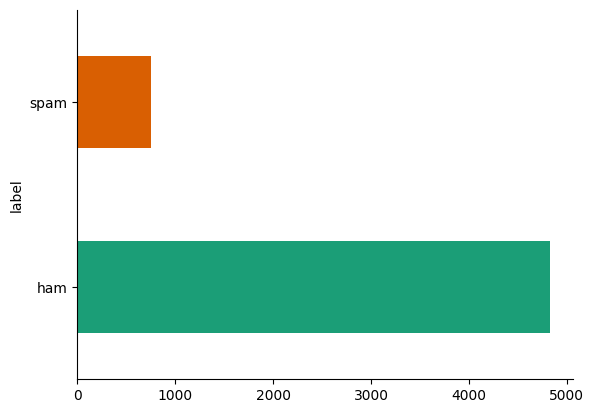

In [ ]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df_sms.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Dalam banyak kumpulan data yang berfokus pada deteksi spam, jumlah pesan spam biasanya lebih banyak daripada pesan ham (non-spam).

# TEXT PREPOCESSING 2
Teks prepocessing menggunakan beberapa tahap atau metode yaitu berasal atu limmatization yang artinya mengurangi kata awalan dan akhiran contoh kepedulian menjadi peduli ,
limatisasi,
menerapkan stemming atau lemmatisasi

## STEMMING
Stemming adalah sebuah metode adalah teknik untuk mengurangi kata-kata ke bentuk dasarnya atau bentuk akar (root form). Tujuan dari stemming adalah untuk menghilangkan infleksi kata seperti akhiran -ed, -ing, -s, -es,an dan sebagainya sehingga kata-kata yang memiliki akar yang sama akan diperlakukan secara seragam.


The process of transforming to the root word.
For example you have caring, cares, cared, caringly carefully then you want to consider them as the same words “care”.
We need stemming because treating them as the same words will reduce overfitting.

In [ ]:
from nltk.stem import SnowballStemmer

In [ ]:
snowball_stemmer = SnowballStemmer('english')

def stem(text):
    """
    :param word_tokens:
    :return: list of words
    """
    stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(stemmed_word)

In [ ]:
text_string = "i am writing puisi very interesting"
text_string = stem(text_string)
print(text_string)

i am write puisi veri interest


Dalam teks tersebut kita tahu bahwa terdapat kata writing menjadi write karena ada akhiran ing jadi hilang atau dihapus dan interesting menjadi interest

## LEMMATIZATION
Pada proses limmatization ini adalah proses dalam pemrosesan bahasa alami (Natural Language Processing atau NLP) di mana kata-kata dipangkas (reduced) menjadi bentuk dasar mereka, yang disebut kata dasar (lemma). Tujuannya adalah untuk mengembalikan kata-kata ke bentuk dasar mereka untuk memudahkan analisis teks. Lematisasi serupa dengan stemming, tetapi lebih kompleks karena mempertimbangkan konteks kata dalam kalimat dan menghasilkan kata-kata yang lebih baku dan sesuai dengan kamus.


The process of transforming to the dictionary base form.
caring, cares, cared, caringly carefully will be transformed into care, care, care caringly carefully.
caringly and carefully are listed in the dictionary.
purpose of lemmatization is also to reduce overfitting.

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)

In [ ]:
text_string = "there he goes. Here I am in flower park"
text_string = lemmatize(text_string)
print(text_string)

there he go . Here I am in flower park


Dalam pembahasan ini kita mengidentifikasikan semua teks yang ada kata akhiran akan dihapus. dari goes menjadi go

## APPLY STEMMING OR LEMATIZATION
Dalam pembahasan ini APPLY STEMMING OR LEMATOZATION adalah adalah instruksi atau tindakan dalam pengolahan teks yang mengacu pada penerapan proses stemming atau lemmatisasi pada kata-kata dalam teks. Ini merupakan langkah yang umum dalam pra-pemrosesan teks dalam berbagai aplikasi NLP (Natural Language Processing).

In [ ]:
df_sms['message_prep_stem'] = df_sms['message_prep6'].apply(stem)
df_sms['message_prep_lemma'] = df_sms['message_prep6'].apply(lemmatize)

df_sms[['message_prep_stem','message_prep_lemma']]

,message_prep_stem,message_prep_lemma
0,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ok lar joke wif u oni,ok lar joking wif u oni
2,free entri wkli comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,nah think goe usf live around though,nah think go usf life around though
...,...,...
5567,nd time tri contact u u £ pound prize claim ea...,nd time tried contact u u £ pound prize claim ...
5568,ü b go esplanad fr home,ü b going esplanade fr home
5569,piti mood soani suggest,pity mood soany suggestion
5570,guy bitch act like interest buy someth els nex...,guy bitching acted like interested buying some...


Dalam pembahasan hasil kodingan diatas adalah kita dapat mengetahui beberapa kalimat yang menggunakan kata awalan dan akahiran dihapus atau kata yang berlebihan,atau angka menjadi huruf

# TEKS EKSPLORATION

## WORD FREG
kependekan dari "word frequency", yang mengacu pada frekuensi kemunculan kata-kata dalam sebuah teks atau kumpulan teks. Ini adalah metrik yang digunakan untuk menentukan seberapa sering sebuah kata muncul dalam sebuah dokumen atau korpus teks.
Word frequency sering digunakan dalam analisis teks untuk:
1. Membantu dalam pemahaman topik atau tema yang dominan dalam teks.
2. Mengidentifikasi kata-kata kunci atau istilah yang sering muncul.
3. Melakukan klasifikasi teks atau analisis sentimen.
4. Membuat ringkasan teks dengan menyoroti kata-kata yang paling penting.
Biasanya, langkah-langkah untuk menghitung word frequency meliputi:
1. Memisahkan teks menjadi token (kata-kata atau frasa).
2. Menghitung berapa kali setiap kata muncul dalam teks.
3. Menyusun daftar kata-kata berdasarkan frekuensi kemunculan mereka, mulai dari yang paling sering muncul hingga yang paling jarang.
4. Menyajikan data frekuensi kata-kata, sering kali dalam bentuk tabel atau visualisasi seperti diagram batang atau word cloud.

In [ ]:
import seaborn as sns

In [ ]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    kamus = {'kata':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)

    return kamus

In [ ]:
kamus_unclean = kamus(check=df_sms['message_prep_lemma'])

<Axes: ylabel='kata'>

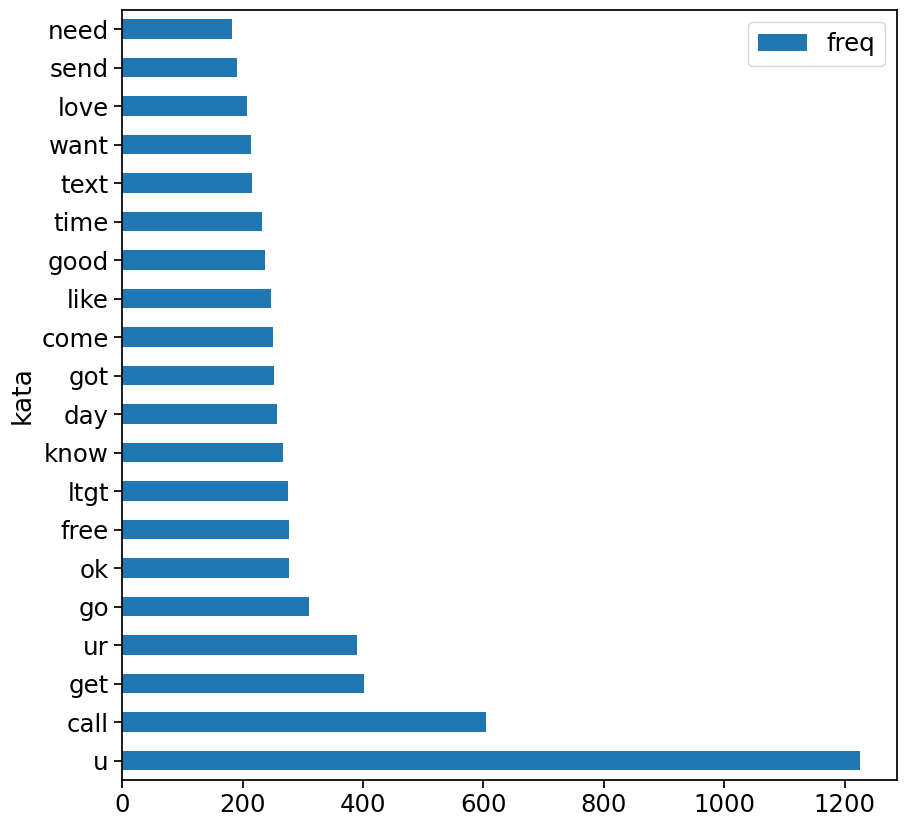

In [ ]:
sns.set_context(context = 'notebook', font_scale = 1.6)
kamus_unclean[:20].plot(kind = 'barh',figsize = (10,10))

sns.set_context(context='notebook', font_scale=1.6): Ini adalah perintah yang digunakan untuk mengatur konteks seaborn menjadi 'notebook' dan mengatur skala font menjadi 1.6. Konteks seaborn mengontrol aspek visual dari plot, seperti ukuran font, ketebalan garis, dan ukuran gambar. Dengan mengatur konteks menjadi 'notebook', Anda menyediakan konfigurasi visual yang cocok untuk digunakan dalam lingkungan notebook. Mengatur skala font ke 1.6 akan meningkatkan ukuran font dalam plot.
kamus_unclean[:20].plot(kind='barh', figsize=(10,10)): Ini adalah perintah untuk membuat diagram batang horizontal dari 20 baris pertama dari DataFrame kamus_unclean. Argumen kind='barh' menunjukkan bahwa jenis plot yang ingin Anda buat adalah diagram batang horizontal. Argumen figsize=(10, 10) menentukan ukuran gambar plot menjadi 10x10 inci.
kata kata yang keluar dari kamus seaborn yaitu call,u,go,time,like,who,need,send,dll sebagainya

## WORD CLOUD
Dalam konteks pemrosesan bahasa alami (Natural Language Processing/NLP), word cloud sering digunakan sebagai alat visualisasi untuk menampilkan kata-kata yang paling umum dalam korpus teks. Ini membantu analisis dan pemahaman topik atau pola dalam data teks.

Dalam kodingan NLP, pembuatan word cloud melibatkan langkah-langkah seperti:

Pembersihan teks: Menghapus karakter khusus, tanda baca, dan kata-kata penghubung yang tidak penting dari teks.
Tokenisasi: Memecah teks menjadi token atau kata-kata individual.
Perhitungan frekuensi kata: Menghitung berapa kali setiap kata muncul dalam teks.
Membuat visualisasi: Menampilkan kata-kata tersebut dalam bentuk visual, di mana ukuran kata menunjukkan seberapa sering kata tersebut muncul.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")

In [ ]:
word_cloud = WordCloud().generate(str(df_sms['message_prep_lemma']))

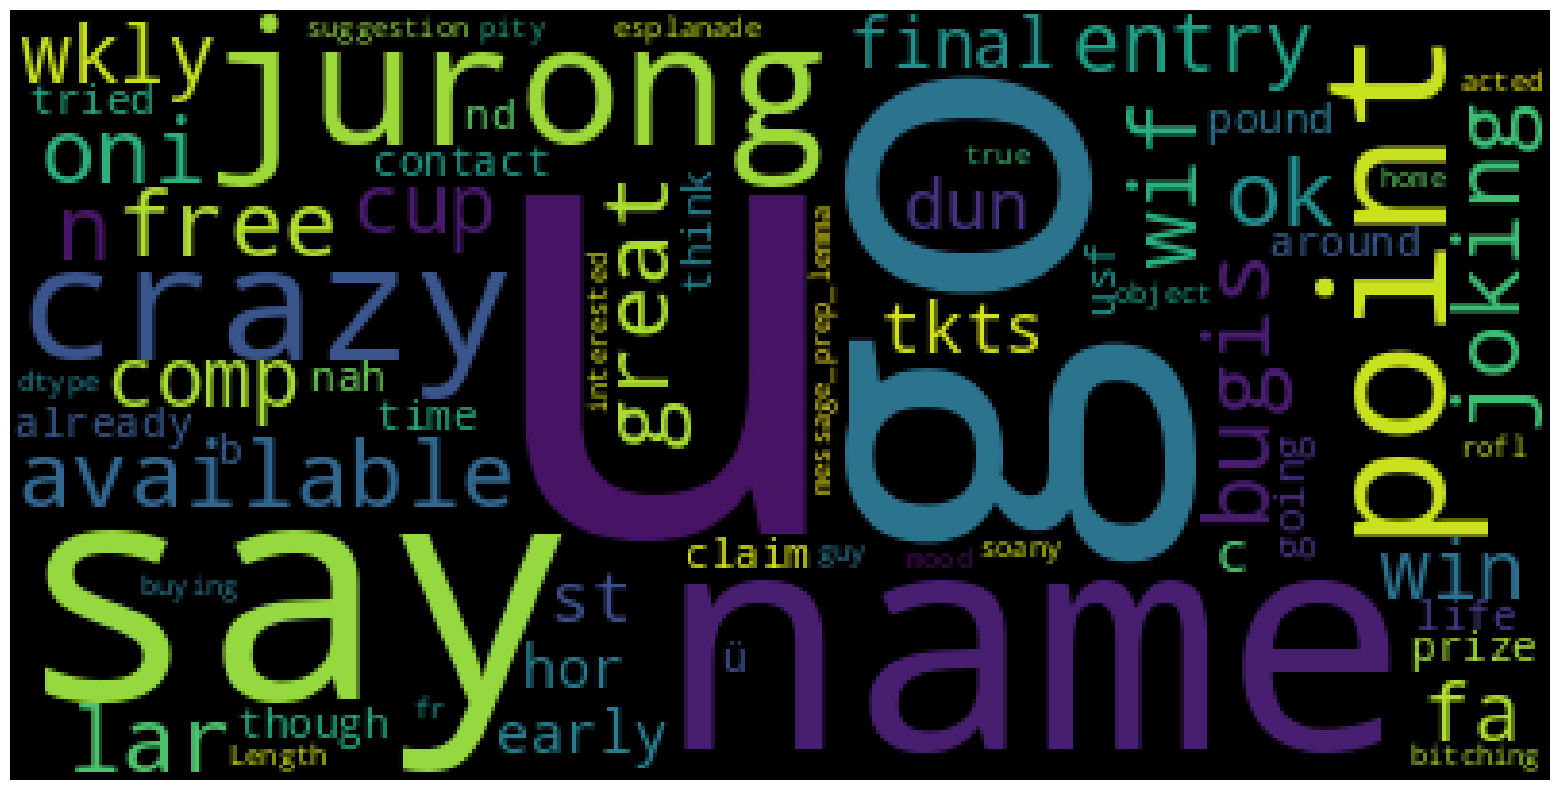

In [ ]:
plot_cloud(word_cloud)

kata yang paling besar hurufnya ada FREE,GO,ENTRY,AVAILABLE,NAME,YOU,F,NAME,JURONG,DLL Sebagainya

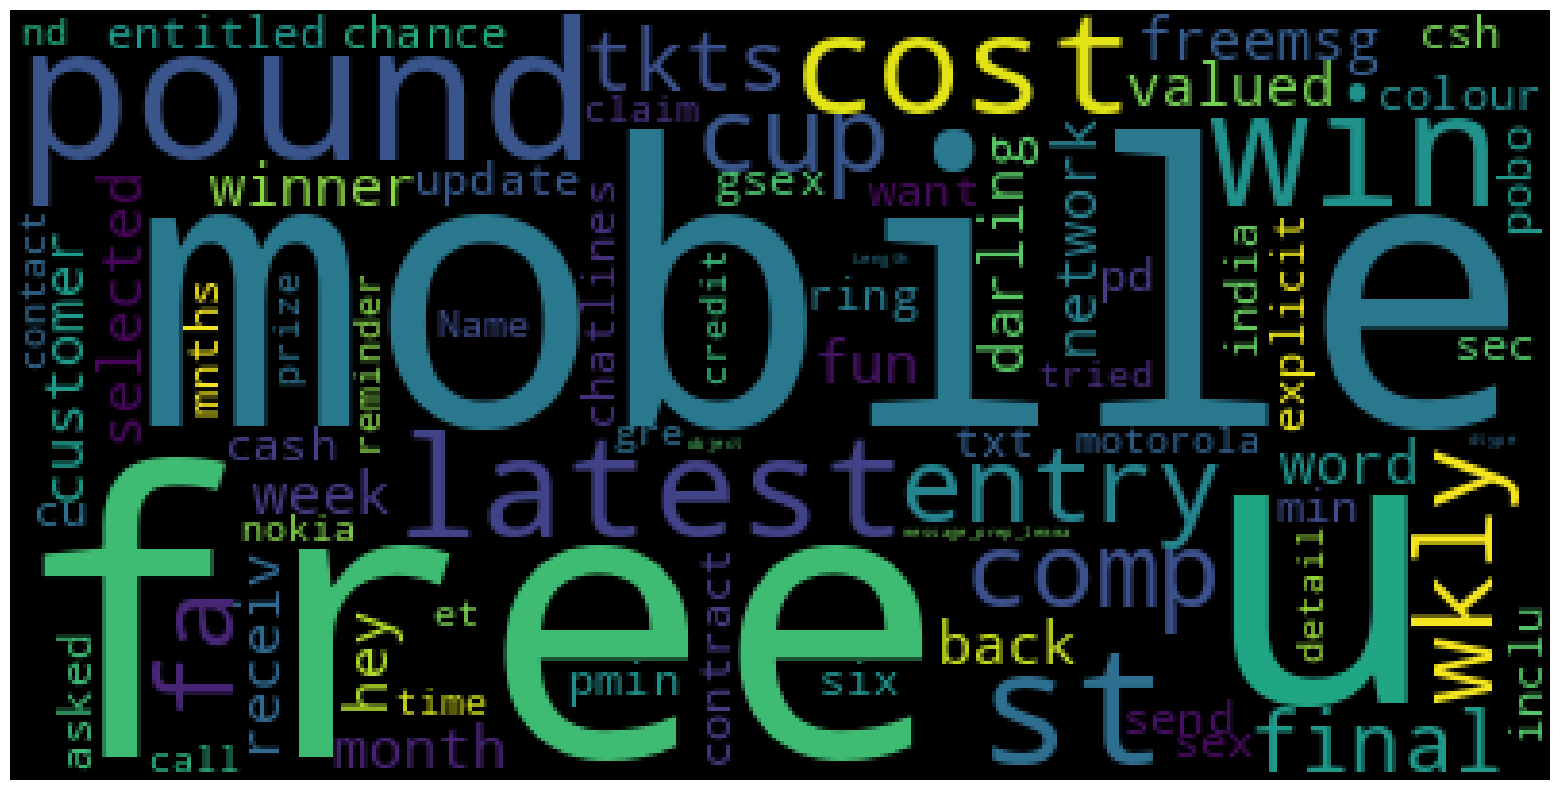

In [ ]:
word_cloud = WordCloud().generate(str(df_sms[df_sms['label'] == 'spam']['message_prep_lemma']))
plot_cloud(word_cloud)

kata kata yang paling besar sendiri ada MOBILE,TEXT,FREE,POUND,ENTRY,WIN

## WORLD CLOUD 2
temukan file png apa saja lalu beri nama 'comment.png'. File ini adalah file yang saya punya hasilnya mungkin berbeda.

In [ ]:
import numpy as np
from PIL import Image

In [ ]:

# Menyiapkan teks untuk word cloud
all_text = "Your text data goes here..."

# Membuat word cloud dengan menggunakan mask
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color='white',
    colormap='Set2',
    collocations=False,
    stopwords=stopwords.words('english'),
    mask=mask
).generate(all_text)

# Menampilkan word cloud
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menampilkan word cloud menggunakan fungsi plot_cloud()
plot_cloud(wordcloud)

### SPAM

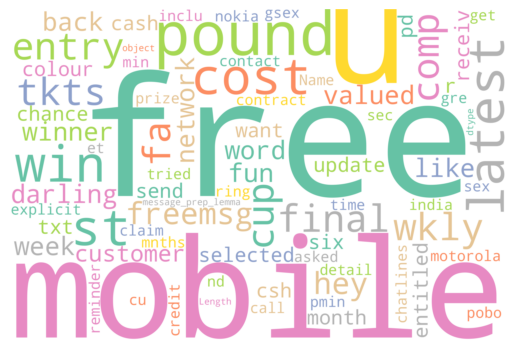

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the mask variable before using it
mask = None  # Replace with your actual mask image or set to None if not needed

# Create the word cloud
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color='white',
    colormap='Set2',
    collocations=False,
    stopwords=stopwords.words('english'),
    mask=mask
).generate(str(df_sms[df_sms['label']=='spam']['message_prep_lemma']))

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

pada kata yang sring muncul yaitu mobile,call,free,text,claim,dll sebagainya

### NON SPAM

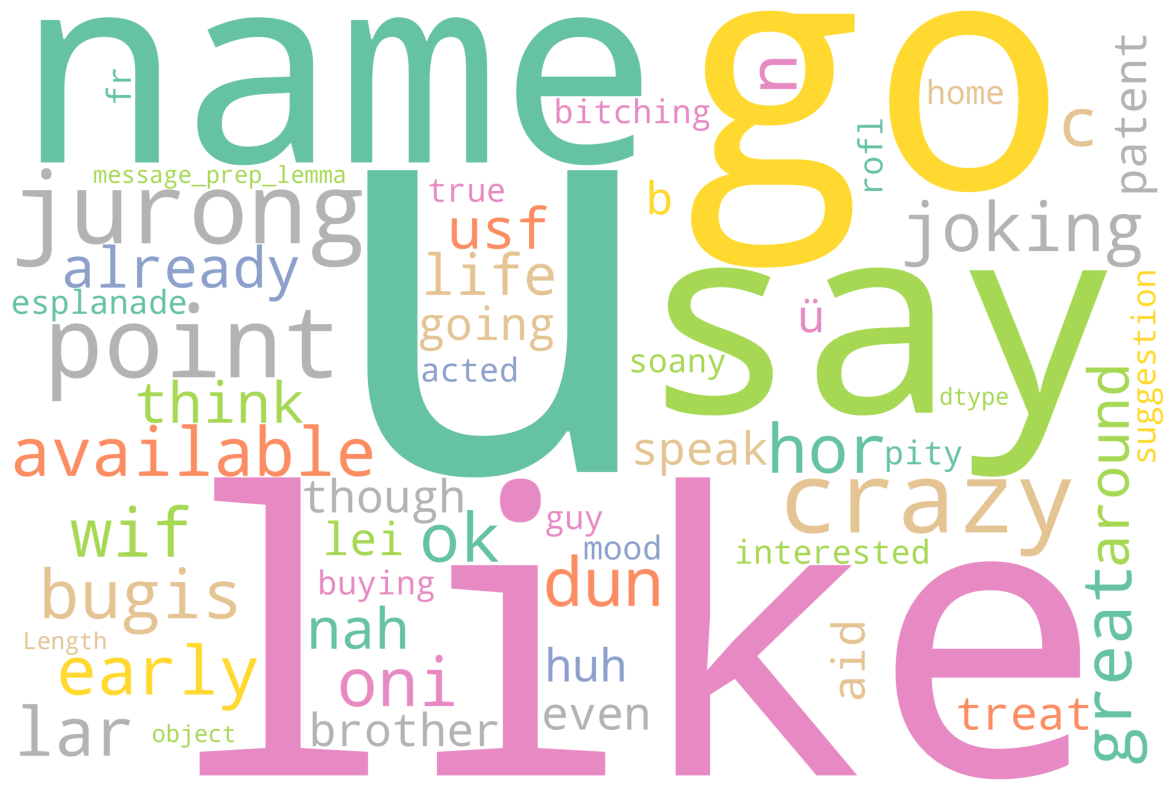

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = stopwords.words('english'), mask=mask).generate(str(df_sms[df_sms['label']=='ham']['message_prep_lemma']))
plot_cloud(wordcloud)

kata yang muncul pada non spam atau bahasa sehari hari di email ataua chaht misal like,say,point,great,available,dll sebagainya

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Membaca gambar mask
mask = np.array(Image.open('path_to_your_mask_image.png'))

# Mendefinisikan word cloud
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color='white',
    colormap='Set2',
    collocations=False,
    stopwords=stopwords.words('english'),
    mask=mask
).generate(str(df_sms[df_sms['label']=='spam']['message_prep_lemma']))

# Menampilkan word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt



In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import numpy as np
from PIL import Image

# Membaca gambar mask
mask = np.array(Image.open('path_to_your_mask_image.png'))

# Mendefinisikan word cloud
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color='white',
    colormap='Set2',
    collocations=False,
    stopwords=stopwords.words('english'),
    mask=mask
).generate(str(df_sms['message_prep_lemma']))



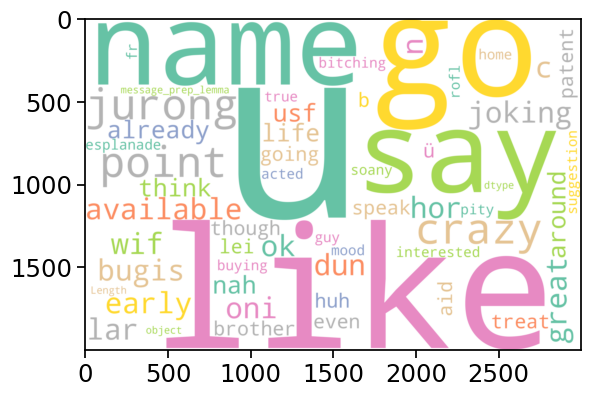

In [ ]:

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("ON")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

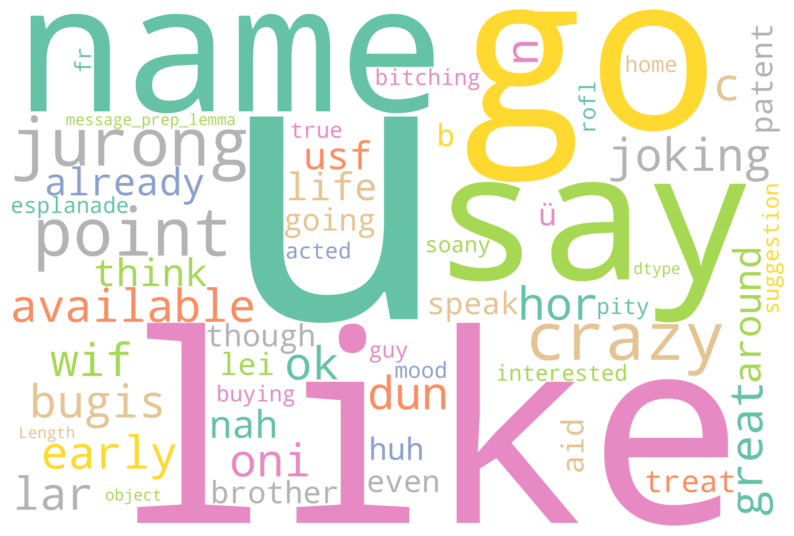

In [ ]:

plot_cloud(wordcloud)


### LENGTH OF SENTENCE
Untuk mengidentifikasi perbedaan antara spam dan non-spam kita dapat memanfaatkan konten lain seperti panjang karakter

In [ ]:
import seaborn as sns

In [ ]:
df_sms['length'] = df_sms['message'].apply(len)

<ipython-input-70-bfd4cf5b75f4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sms_spam['length'])
<ipython-input-70-bfd4cf5b75f4>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sms_ham['length'])


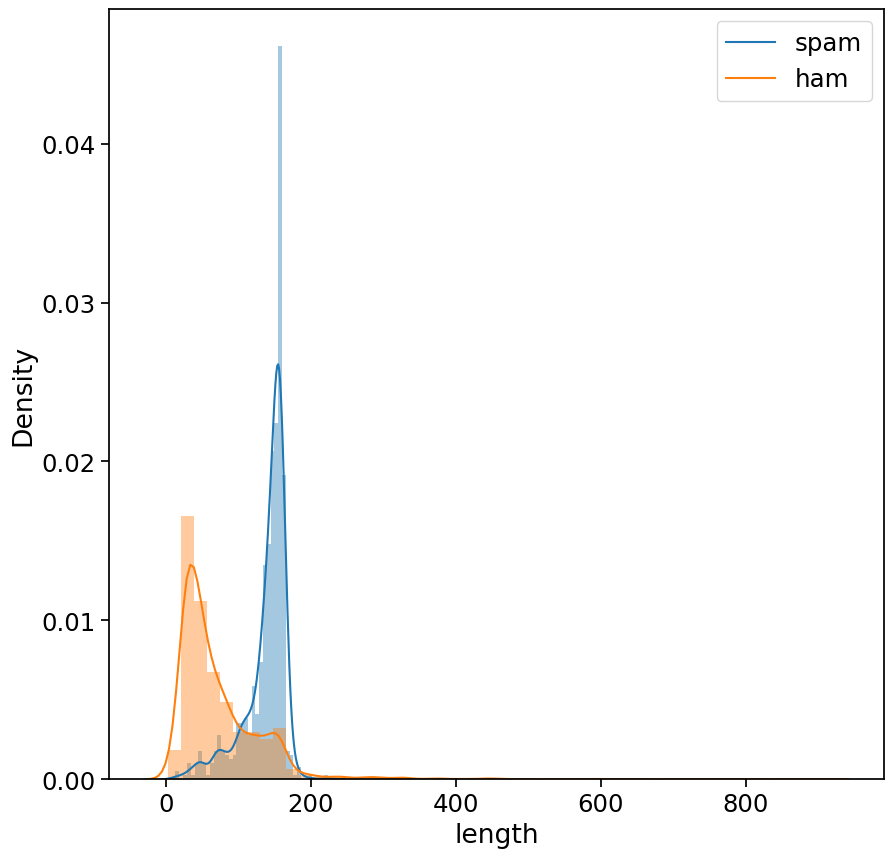

In [ ]:
plt.figure(figsize = (10,10))

df_sms_spam = df_sms[df_sms['label'] == 'spam']
df_sms_ham = df_sms[df_sms['label'] == 'ham']

sns.distplot(df_sms_spam['length'])
sns.distplot(df_sms_ham['length'])

plt.legend(['spam','ham'])

plt.show()

lenghth of sentence dalam kodingan tersebut adalah menunjukan bahwa spam sms lebih banyak persennya daripada yang non spam,karena notifikasi spam pasti jumlahya tidak sedikit daripada yang tidak ada pengaturan spam sms

# DOCUMENT TERM MATRIKS
Document-Term Matrix (DTM) adalah representasi matematis dari sejumlah dokumen dalam sebuah koleksi teks, di mana setiap dokumen direpresentasikan sebagai vektor yang berisi frekuensi kemunculan setiap kata di dalam dokumen tersebut. DTM biasanya digunakan dalam analisis teks dan pemrosesan bahasa alami (Natural Language Processing/NLP).

Dalam DTM, setiap baris mewakili satu dokumen, dan setiap kolom mewakili satu kata atau token unik yang muncul di seluruh koleksi dokumen. Nilai di setiap sel dalam matriks menunjukkan frekuensi kemunculan kata tertentu dalam dokumen tertentu. Dengan demikian, DTM memungkinkan representasi vektor dari setiap dokumen dalam ruang fitur yang terdiri dari semua kata unik dalam koleksi dokumen.

## TERM FREQUENCY


- Frequency term in the document
- i.e. if the word appears twice, the frequency in the vector will be 2
- (D1) fun learning is fun


In [ ]:
from collections import Counter

def term_frequency(document):
    word_count = Counter(document.split())
    total_words = len(document.split())
    term_freq = {word: count/total_words for word, count in word_count.items()}
    return term_freq

# Contoh penggunaan
document = "fun learn fun can do all day some feel."
tf = term_frequency(document)
print(tf)

{'fun': 0.2222222222222222, 'learn': 0.1111111111111111, 'can': 0.1111111111111111, 'do': 0.1111111111111111, 'all': 0.1111111111111111, 'day': 0.1111111111111111, 'some': 0.1111111111111111, 'feel.': 0.1111111111111111}


dalam term frequency ini kita dapat memasukan sebuah dokumen didalamnya yang merujuk 0,1 pada setiap objectnya

In [ ]:
words_example = ["fun learn fun",
                 "can do all day",
                 "some feel"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer dari pustaka Scikit-learn (sklearn) digunakan untuk mengubah kumpulan teks menjadi representasi numerik yang dapat digunakan oleh model pembelajaran mesin.

In [ ]:
vect = CountVectorizer()
vect.fit(words_example)

CountVectorizer()

Pemanggilan metode fit pada objek CountVectorizer (vect) dengan argumen words_example digunakan untuk mempelajari kosakata atau vocabulary dari kumpulan kata yang diberikan (words_example).

In [ ]:
print("vocabulaary size:",len(vect.vocabulary_))
print("vocabulaary content:\n",vect.vocabulary_)

vocabulaary size: 8
vocabulaary content:
 {'fun': 5, 'learn': 6, 'can': 1, 'do': 3, 'all': 0, 'day': 2, 'some': 7, 'feel': 4}


vocabulaary size" mencetak ukuran kosakata, yaitu jumlah kata unik dalam kumpulan kata yang telah diproses dan digunakan untuk membangun kosakata. Sedangkan "vocabulaary content" seharusnya mencetak isi kosakata dalam format kunci-nilai, di mana kunci adalah kata-kata dalam teks dan nilainya adalah indeks numerik yang menunjukkan posisi kata tersebut dalam vektor fitur. Namun, mencoba mencetak kamus secara langsung tidak akan memberikan hasil yang bermakna, dan diperlukan pendekatan yang tepat untuk melihat isi dari kamus vocabulary_. Contoh pendekatan yang dapat digunakan adalah mencetak beberapa contoh kunci-nilai atau mengiterasi melalui kamus untuk melihat seluruh konten kosakata.







In [ ]:
dtm = vect.transform(words_example)

Setiap baris dalam dtm mewakili satu dokumen atau satu sampel teks dari kumpulan kata yang diberikan (words_example).
Setiap kolom dalam dtm mewakili satu kata dalam kosakata yang telah dipelajari oleh CountVectorizer.
Nilai di setiap sel dalam dtm menunjukkan jumlah kemunculan kata yang sesuai dengan kolomnya dalam dokumen yang sesuai dengan barisnya. Ini berarti bahwa setiap sel akan berisi angka yang menunjukkan berapa kali kata tersebut muncul dalam dokumen tersebut.
dtm akan memiliki dimensi (jumlah dokumen) x (jumlah kata dalam kosakata).
Dengan menggunakan representasi vektor ini, Anda dapat menerapkan berbagai algoritma pembelajaran mesin, seperti klasifikasi atau pengelompokan, pada data teks tersebut. Vektor yang dihasilkan akan menjadi input untuk model pembelajaran mesin dan dapat digunakan untuk melakukan berbagai analisis teks, seperti analisis sentimen, klasifikasi dokumen, atau pengelompokan teks.







In [ ]:
dtm.toarray()

array([[0, 0, 0, 0, 0, 2, 1, 0],
       [1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1]])

Representasi dokumen dalam bentuk array NumPy akan memiliki struktur yang sama dengan matriks hasil transformasi (dtm), tetapi dalam bentuk yang lebih mudah dibaca dan diinterpretasikan.
Setiap baris dalam array NumPy mewakili satu dokumen atau satu sampel teks dari kumpulan kata yang diberikan.
Setiap kolom dalam array NumPy mewakili satu kata dalam kosakata yang telah dipelajari oleh CountVectorizer.
Nilai di setiap sel dalam array NumPy akan menunjukkan jumlah kemunculan kata yang sesuai dengan kolomnya dalam dokumen yang sesuai dengan barisnya. Ini serupa dengan nilai-nilai dalam sparse matrix hasil transformasi (dtm).
Dengan menggunakan array NumPy ini, Anda dapat dengan mudah melakukan operasi dan analisis lebih lanjut pada representasi dokumen, seperti melakukan visualisasi, pemrosesan lebih lanjut, atau memasukkannya ke dalam model pembelajaran mesin yang membutuhkan representasi dokumen dalam bentuk array.

In [ ]:
vect.get_feature_names_out()

array(['all', 'can', 'day', 'do', 'feel', 'fun', 'learn', 'some'],
      dtype=object)

In [ ]:
dtm = pd.DataFrame(dtm.toarray(),
                               columns = vect.get_feature_names_out())

In [ ]:
words_example

['fun learn fun', 'can do all day', 'some feel']

In [ ]:
dtm

<3x8 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

> ## Term Frequency (TF) - N-grams


Bag of words ignore word order completely.
<br>
These two sentences will have the same tokenization.
- It’s bad, not good at all
- It’s good, not bad at all




In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Kalimat-kalimat yang akan direpresentasikan dalam BoW
sentences = [
    "It’s bad, not good at all",
    "It’s good, not bad at all"
]

# Inisialisasi CountVectorizer dengan tokenisasi kustom
custom_tokenizer = lambda x: x.split(',')  # Tokenisasi berdasarkan koma
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)

# Melakukan transformasi teks menjadi representasi BoW
X = vectorizer.fit_transform(sentences)

# Mendapatkan daftar fitur (kata-kata) dari vektor BoW
features = vectorizer.get_feature_names_out()

# Mencetak hasil representasi BoW
print("Features:", features)
print("BoW Representation:")
print(X.toarray())


Features: [' not bad at all' ' not good at all' 'it’s bad' 'it’s good']
BoW Representation:
[[0 1 1 0]
 [1 0 0 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


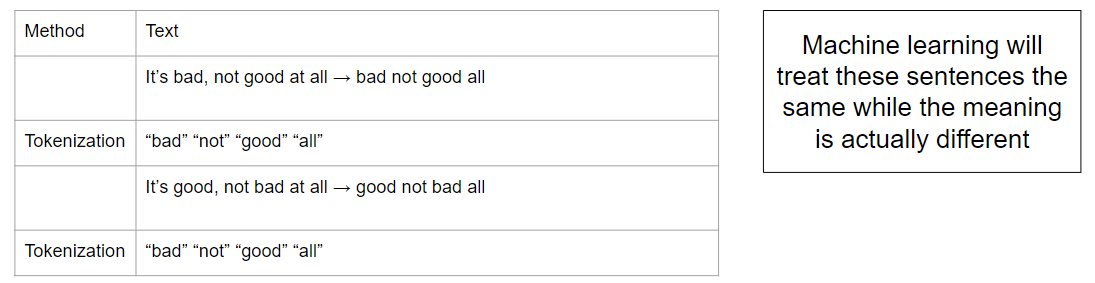

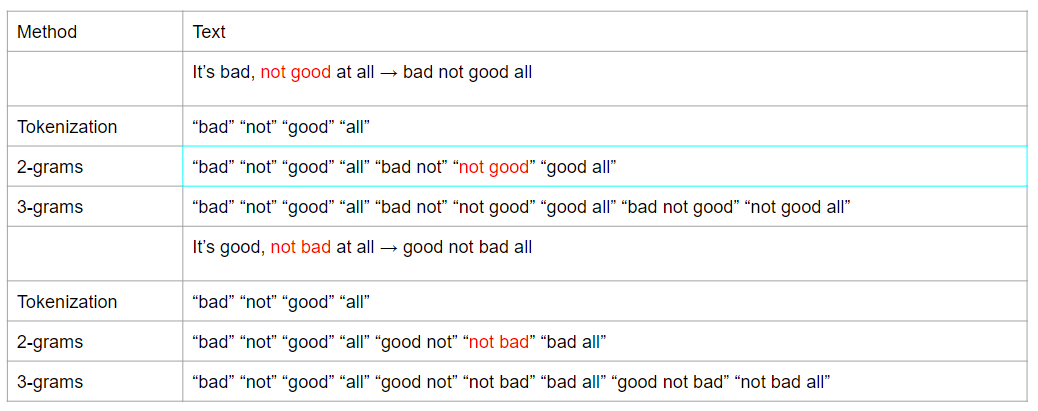

In [ ]:
words_example = ["You are realy love me to, don't you ?",
                 "I am the best in here forever than there is"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer(ngram_range = (1,2))
vect.fit(words_example)

CountVectorizer(ngram_range=(1, 2))

In [ ]:
print("vocabulaary size:",len(vect.vocabulary_))
print("vocabulaary content:\n",vect.vocabulary_)

vocabulaary size: 31
vocabulaary content:
 {'you': 29, 'are': 2, 'realy': 19, 'love': 15, 'me': 17, 'to': 27, 'don': 6, 'you are': 30, 'are realy': 3, 'realy love': 20, 'love me': 16, 'me to': 18, 'to don': 28, 'don you': 7, 'am': 0, 'the': 23, 'best': 4, 'in': 12, 'here': 10, 'forever': 8, 'than': 21, 'there': 25, 'is': 14, 'am the': 1, 'the best': 24, 'best in': 5, 'in here': 13, 'here forever': 11, 'forever than': 9, 'than there': 22, 'there is': 26}


In [ ]:
dtm = vect.transform(words_example)

In [ ]:
dtm.toarray()

array([[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 2, 1],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 0]])

In [ ]:
vect.get_feature_names_out()

array(['am', 'am the', 'are', 'are realy', 'best', 'best in', 'don',
       'don you', 'forever', 'forever than', 'here', 'here forever', 'in',
       'in here', 'is', 'love', 'love me', 'me', 'me to', 'realy',
       'realy love', 'than', 'than there', 'the', 'the best', 'there',
       'there is', 'to', 'to don', 'you', 'you are'], dtype=object)

In [ ]:
dtm = pd.DataFrame(dtm.toarray(),
                               columns = vect.get_feature_names_out())

In [ ]:
words_example

["You are realy love me to, don't you ?",
 'I am the best in here forever than there is']

In [ ]:
dtm

,am,am the,are,are realy,best,best in,don,don you,forever,forever than,...,than,than there,the,the best,there,there is,to,to don,you,you are
0,0,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,2,1
1,1,1,0,0,1,1,0,0,1,1,...,1,1,1,1,1,1,0,0,0,0


## TERM FREQUENSI INVERST DOCUMENT


In [ ]:
words_example = ["spirit do can all dream star"]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vect = TfidfVectorizer(norm = None)
vect.fit(words_example)

TfidfVectorizer(norm=None)

In [ ]:
print("vocabulaary size:",len(vect.vocabulary_))
print("vocabulaary content:\n",vect.vocabulary_)

vocabulaary size: 6
vocabulaary content:
 {'spirit': 4, 'do': 2, 'can': 1, 'all': 0, 'dream': 3, 'star': 5}


In [ ]:
dtm_tf_idf = vect.transform(words_example)

In [ ]:
dtm_tf_idf.toarray()

array([[1., 1., 1., 1., 1., 1.]])

In [ ]:
vect.get_feature_names_out()

array(['all', 'can', 'do', 'dream', 'spirit', 'star'], dtype=object)

In [ ]:
dtm_tf_idf = pd.DataFrame(dtm_tf_idf.toarray(),
                               columns = vect.get_feature_names_out())

In [ ]:
dtm_tf_idf

,all,can,do,dream,spirit,star
0,1.0,1.0,1.0,1.0,1.0,1.0


# MAKE DTM

## DATA SPLITING

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
text = df_sms['message_prep_lemma']
y = np.where(df_sms['label'] == 'spam',1,0)

In [ ]:
text_train, text_test, y_train, y_test = train_test_split(text, y)

## FIT AND TRANSFORM METHOD

In [ ]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

## DTM ATRIBUT

In [ ]:
print('X_train size:\n', repr(X_train))
print('X_test size:\n', repr(X_test))

X_train size:
 <4179x6743 sparse matrix of type '<class 'numpy.int64'>'
	with 33361 stored elements in Compressed Sparse Row format>
X_test size:
 <1393x6743 sparse matrix of type '<class 'numpy.int64'>'
	with 9617 stored elements in Compressed Sparse Row format>


In [ ]:
feature_names = vect.get_feature_names_out()

In [ ]:
print('number of features:', len(feature_names))
print('first 10 features:\n', feature_names[:10])
print('last 10 features:\n', feature_names[-10:])

number of features: 6743
first 10 features:
 ['aa' 'aah' 'aaniye' 'aaooooright' 'aathilove' 'aathiwhere' 'ab' 'abbey'
 'abdomen' 'abeg']
last 10 features:
 ['zed' 'zero' 'zf' 'zindgi' 'zoe' 'zoom' 'zouk' 'zyada' 'üll' '〨ud']


# TEKS KLASIFICATION

## MODELING BENCHMARK


You can use some algo you already learned
- Logistic Regression
- RF
- Boosting, etc

<br>

There are another method such as
- Naive Bayes
- Support Vector Classifier (SVC)
- Deep Learning


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1218
           1       0.98      0.83      0.90       175

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.94      1393
weighted avg       0.98      0.98      0.98      1393



## HYPERMAD TUNING

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
tf_idf_prep = TfidfVectorizer()
model = LogisticRegression()
pipe = Pipeline([('preprocess',tf_idf_prep),('model',model)])

param_grid = {'model__C':[0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv = 5)

In [ ]:
grid.fit(text_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess', TfidfVectorizer()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print('best score', grid.best_score_)

best score 0.9763100593072229


In [ ]:
grid.best_estimator_.fit(text_train, y_train)
y_pred_tf_idf = grid.best_estimator_.predict(text_test)

## RESULT

### BEFORE

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1218
           1       0.98      0.83      0.90       175

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.94      1393
weighted avg       0.98      0.98      0.98      1393



### AFTER

In [ ]:
print(classification_report(y_test,y_pred_tf_idf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1218
           1       0.97      0.84      0.90       175

    accuracy                           0.98      1393
   macro avg       0.97      0.92      0.94      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Jadi data sebelum di olah dan sesudaha di olah hasilnya sama atau accuracy,macro,dan weighted avg